In [1]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint,ReduceLROnPlateau

Machine Amrta

In [344]:
filename = "C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Train_Foot.csv"
filename_test= 'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Test_Foot.csv'

Machine Dylane

In [2]:
filename = 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Train_Foot.csv'
filename_test= 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Test_Foot.csv'

In [3]:
# Chargement des données csv
data= pd.read_csv(filename,sep=";",index_col=0)
data.head()

,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2409,6154
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4008,3054
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3029,4815
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2803,2045
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2156,1065


# Construction du Y 

In [4]:
def nb_buts(x,data):
    tab =data.values
    for i in tab:
        if i[10]>x:
            i[24] = 1
        else:
             i[24] = 0
    a = tab[:,24]
    return a.astype(int)

## Y pour buts >0,5

In [ ]:
a=nb_buts(0.5,data)
data_x = data.copy()
data_x['buts_class'] = a.astype("int64")
data_x

## Y pour buts > 1,5

In [5]:
a=nb_buts(1.5,data)
data_x = data.copy()
data_x['buts_class'] = a.astype("int64")
data_x

,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam,buts_class
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2409,6154,1
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4008,3054,1
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3029,4815,0
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2803,2045,1
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,0,1.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2156,1065,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2018-05-19,Villarreal,Real Madrid,0.0,0,2.0,2.0,0.0,2.0,2.0,...,2.814815,0.613757,1.439153,0.984127,1.037037,0.396825,0.433862,6451,15239,1
376,2018-05-20,Ath Bilbao,Espanol,2.0,1,0.0,1.0,0.0,1.0,1.0,...,1.164021,0.587302,0.497354,1.164021,1.412698,0.544974,0.656085,4273,5802,0
377,2018-05-20,Ath Madrid,Eibar,0.0,0,2.0,2.0,1.0,1.0,2.0,...,1.253968,0.693122,0.608466,0.640212,1.407407,0.232804,0.640212,13709,4725,1
378,2018-05-20,Barcelona,Sociedad,1.0,2,1.0,0.0,0.0,0.0,0.0,...,1.444444,1.105820,0.682540,0.809524,1.391534,0.349206,0.640212,14840,4571,0


## Y pour buts > 2,5

In [ ]:
a=nb_buts(2.5,data)
data_x = data.copy()
data_x['buts_class'] = a.astype("int64")
data_x

# Sans les win/lose/cons et les moyennes half_time plus utiles pour les modèles de predic mi-temps

In [6]:
x=data_x[['puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away','moy_goals_conceded_home',
        'moy_goals_conceded_away']]

data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away',
                        'moy_goals_conceded_home','moy_goals_conceded_away']]
x_prediction


,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,moy_goals_home,moy_goals_away,moy_goals_conceded_home,moy_goals_conceded_away
1429,2020-07-02,FINISHED,279509,AS Roma,Udinese Calcio,100,115,6735,3100,1.892857,0.821429,1.357143,1.464286
1984,2020-07-03,FINISHED,274443,CD Santa Clara,CS Marítimo,5530,5575,3175,1672,1.000000,1.000000,1.206897,1.310345
1090,2020-07-03,FINISHED,273894,Club Atlético de Madrid,RCD Mallorca,78,89,9329,2475,1.341463,1.060606,0.969697,1.696970
1432,2020-07-04,FINISHED,279520,SS Lazio,AC Milan,110,98,6846,4490,2.275862,1.241379,0.965517,1.275862
1431,2020-07-04,FINISHED,279526,US Sassuolo Calcio,US Lecce,471,5890,3086,1781,1.758621,1.241379,1.724138,2.275862
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,1.972973,1.548387,1.161290,0.967742
2025,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0.774194,0.833333,1.366667,1.666667
2026,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,0.935484,1.612903,1.193548,1.096774
2027,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0.806452,0.774194,1.354839,1.903226


In [7]:
y = data_x.buts_class
np.unique(y)

array([0, 1])

In [8]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y_train = y_train.astype(np.int)
classes=np.unique(y_train)
nbClasses=len(classes)
print(x_train.shape,y_train.shape)
print(nbClasses)
y_train

(9251, 6) (9251,)
2


array([1, 1, 0, ..., 1, 1, 1])

In [15]:
def create_model():
    
    model = Sequential()
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(nbClasses, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [10]:
def create_model2():
    
    model = Sequential()
    
    model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(256, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(256, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
    
    model.add(BatchNormalization())
    model.add(Dropout(0.05))
    
    model.add(Dense(nbClasses, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [16]:
model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               3584      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_9 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_11 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_12 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_13 (Dense)             (None, 128)              

In [17]:
save = ModelCheckpoint('model_butsV2.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)

In [18]:
history = model.fit(x_train, y_train,validation_data=(x_test,y_test),batch_size=90,epochs=50,
                    callbacks = [save])

Train on 9251 samples, validate on 2313 samples
Epoch 1/50
8910/9251 [===========================>..] - ETA: 0s - loss: 9.7833 - accuracy: 0.6532 
Epoch 00001: val_accuracy improved from -inf to 0.74103, saving model to model_butsV2.h5
9251/9251 [==============================] - 3s 329us/sample - loss: 9.4467 - accuracy: 0.6558 - val_loss: 0.5869 - val_accuracy: 0.7410
Epoch 2/50
8910/9251 [===========================>..] - ETA: 0s - loss: 0.6141 - accuracy: 0.7276
Epoch 00002: val_accuracy did not improve from 0.74103
9251/9251 [==============================] - 2s 171us/sample - loss: 0.6119 - accuracy: 0.7292 - val_loss: 0.5904 - val_accuracy: 0.7030
Epoch 3/50
9000/9251 [============================>.] - ETA: 0s - loss: 0.5910 - accuracy: 0.7380
Epoch 00003: val_accuracy did not improve from 0.74103
9251/9251 [==============================] - 2s 186us/sample - loss: 0.5916 - accuracy: 0.7369 - val_loss: 0.6178 - val_accuracy: 0.6818
Epoch 4/50
9000/9251 [=========================

Epoch 29/50
9090/9251 [============================>.] - ETA: 0s - loss: 0.5686 - accuracy: 0.7435
Epoch 00029: val_accuracy did not improve from 0.74103
9251/9251 [==============================] - 2s 181us/sample - loss: 0.5685 - accuracy: 0.7435 - val_loss: 0.5647 - val_accuracy: 0.7410
Epoch 30/50
9180/9251 [============================>.] - ETA: 0s - loss: 0.5661 - accuracy: 0.7437
Epoch 00030: val_accuracy did not improve from 0.74103
9251/9251 [==============================] - 2s 193us/sample - loss: 0.5661 - accuracy: 0.7435 - val_loss: 0.5643 - val_accuracy: 0.7410
Epoch 31/50
9090/9251 [============================>.] - ETA: 0s - loss: 0.5675 - accuracy: 0.7435
Epoch 00031: val_accuracy did not improve from 0.74103
9251/9251 [==============================] - 2s 192us/sample - loss: 0.5674 - accuracy: 0.7435 - val_loss: 0.5648 - val_accuracy: 0.7410
Epoch 32/50
9180/9251 [============================>.] - ETA: 0s - loss: 0.5674 - accuracy: 0.7432
Epoch 00032: val_accuracy di

Text(0, 0.5, 'Accuracy')

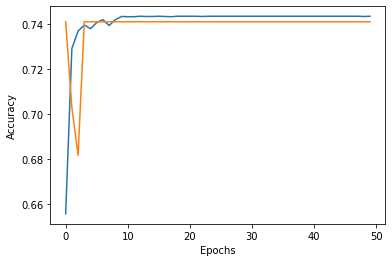

In [19]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Prédiction

In [358]:
unique = x_prediction.values

results = []
zero =[]
un = []
deux = []
i = 0
x_train.shape
predictions_final = model.predict(np.array([x_train[1]]))
predictions_final.shape

(1, 3)

In [359]:
model.load_weights("model_buts.h5")

In [360]:
for i in unique:
    predictions_final = model.predict(np.array([[i[7],i[8],i[9],i[10],i[11],i[12]]])) 
    result = np.argmax(predictions_final)
    results.append(result)
    pred0 =round(predictions_final[0][0],2)
    zero.append(pred0)
    pred1 =round(predictions_final[0][1],2)
    un.append(pred1)
    pred2 =round(predictions_final[0][2],2)
    deux.append(pred2)
    print(result,predictions_final)

2 [[0.278184   0.23252921 0.4892868 ]]
2 [[0.23323534 0.2758901  0.49087453]]
2 [[0.27077746 0.25366512 0.4755574 ]]
2 [[0.21867824 0.22409591 0.5572259 ]]
2 [[0.28944045 0.24040201 0.4701576 ]]
2 [[0.13937442 0.1883676  0.672258  ]]
2 [[0.25166672 0.1957442  0.5525891 ]]
2 [[0.28541505 0.22255456 0.49203035]]
2 [[0.26928985 0.21842186 0.51228833]]
2 [[0.17946991 0.20866397 0.61186606]]
2 [[0.22981094 0.25034207 0.519847  ]]
2 [[0.26509795 0.2488673  0.48603475]]
2 [[0.21948625 0.24766248 0.5328513 ]]
2 [[0.23621784 0.24510185 0.5186803 ]]
2 [[0.21192619 0.24863891 0.53943485]]
2 [[0.21144214 0.1729703  0.61558753]]
2 [[0.27448973 0.20968407 0.5158263 ]]
2 [[0.2708498  0.25386223 0.475288  ]]
2 [[0.16799119 0.20533979 0.62666905]]
2 [[0.2524578  0.23766322 0.509879  ]]
2 [[0.25536782 0.2511958  0.49343646]]
2 [[0.2198992  0.22690691 0.5531938 ]]
2 [[0.21319917 0.22061375 0.566187  ]]
2 [[0.28583315 0.22105151 0.49311534]]
2 [[0.2728289  0.19330299 0.53386813]]
2 [[0.26093313 0.2475316 

2 [[0.27518043 0.21001326 0.51480633]]
2 [[0.28060612 0.24264947 0.4767444 ]]
2 [[0.27980733 0.25794503 0.4622476 ]]
2 [[0.23014003 0.27446592 0.49539408]]
2 [[0.2234274 0.2425213 0.5340513]]
2 [[0.27168944 0.26296607 0.4653445 ]]
2 [[0.21570785 0.21064004 0.573652  ]]
2 [[0.2619705  0.23958237 0.49844712]]
2 [[0.28737566 0.23556474 0.47705963]]
2 [[0.2994688  0.22599562 0.4745356 ]]
2 [[0.27099407 0.24000734 0.48899862]]
2 [[0.28461128 0.23286492 0.48252377]]
2 [[0.2929784  0.22706325 0.47995833]]
2 [[0.20079516 0.249096   0.55010885]]
2 [[0.24449955 0.28122976 0.47427064]]
2 [[0.2036493 0.2530523 0.5432984]]
2 [[0.18856552 0.27369702 0.5377374 ]]
2 [[0.25750867 0.2394415  0.5030498 ]]
2 [[0.2601685  0.26425767 0.47557378]]
2 [[0.26096663 0.21708962 0.5219438 ]]
2 [[0.29047057 0.23842143 0.47110802]]
2 [[0.26076522 0.23626326 0.5029716 ]]
2 [[0.27767313 0.25946382 0.462863  ]]
2 [[0.26117235 0.24019526 0.49863243]]
2 [[0.3005962  0.22823365 0.4711701 ]]
2 [[0.2946261  0.23726599 0.468

In [361]:
df = {'date':x_prediction.date,'id_match':x_prediction.id_match,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,'id_AwayTeam':x_prediction.idAwayTeam,
      'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'< 0,5 buts':zero,'< 1,5 buts':un,'< 2,5 buts':deux}
df = pd.DataFrame(df)
df

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,"< 0,5 buts","< 1,5 buts","< 2,5 buts"
1424,2020-07-01,279508,FINISHED,99,471,ACF Fiorentina,US Sassuolo Calcio,0.28,0.23,0.49
1085,2020-07-01,273889,FINISHED,90,94,Real Betis Balompié,Villarreal CF,0.23,0.28,0.49
1423,2020-07-01,279512,FINISHED,103,104,Bologna FC 1909,Cagliari Calcio,0.27,0.25,0.48
1983,2020-07-01,274431,FINISHED,498,5533,Sporting Clube de Portugal,Gil Vicente FC,0.22,0.22,0.56
1982,2020-07-01,274433,FINISHED,5568,1049,Os Belenenses Futebol,CD Tondela,0.29,0.24,0.47
...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,0.24,0.25,0.51
2025,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,0.26,0.25,0.49
2026,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,0.27,0.23,0.50
2027,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,0.29,0.24,0.46


In [362]:
df.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs.csv',index = False)
df.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs.json')

In [363]:
finished = []
scheduled = []

In [364]:
for i in df.values:
    if i[2] == 'FINISHED':
        finished.append(i)
    else:
        scheduled.append(i)

In [365]:
column_names = ["date","id_match", "status","id_HomeTeam","id_AwayTeam","homeTeam","AwayTeam","< 0,5 buts","< 1,5 buts","< 2,5 buts"]
df_fini = pd.DataFrame(finished,columns = column_names)
df_programme = pd.DataFrame(scheduled,columns = column_names)

In [366]:
df_fini

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,"< 0,5 buts","< 1,5 buts","< 2,5 buts"
0,2020-07-01,279508,FINISHED,99,471,ACF Fiorentina,US Sassuolo Calcio,0.28,0.23,0.49
1,2020-07-01,273889,FINISHED,90,94,Real Betis Balompié,Villarreal CF,0.23,0.28,0.49
2,2020-07-01,279512,FINISHED,103,104,Bologna FC 1909,Cagliari Calcio,0.27,0.25,0.48
3,2020-07-01,274431,FINISHED,498,5533,Sporting Clube de Portugal,Gil Vicente FC,0.22,0.22,0.56
4,2020-07-01,274433,FINISHED,5568,1049,Os Belenenses Futebol,CD Tondela,0.29,0.24,0.47
...,...,...,...,...,...,...,...,...,...,...
82,2020-07-09,279534,FINISHED,450,108,Hellas Verona FC,FC Internazionale Milano,0.23,0.20,0.57
83,2020-07-09,273907,FINISHED,89,88,RCD Mallorca,Levante UD,0.29,0.22,0.49
84,2020-07-09,273913,FINISHED,278,745,SD Eibar,CD Leganés,0.26,0.25,0.49
85,2020-07-09,264674,FINISHED,62,340,Everton FC,Southampton FC,0.27,0.25,0.48


In [367]:
df_programme

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,"< 0,5 buts","< 1,5 buts","< 2,5 buts"
0,2020-07-11,264686,SCHEDULED,68,563,Norwich City FC,West Ham United FC,0.29,0.23,0.48
1,2020-07-11,264689,SCHEDULED,346,67,Watford FC,Newcastle United FC,0.28,0.22,0.50
2,2020-07-11,264683,SCHEDULED,64,328,Liverpool FC,Burnley FC,0.11,0.17,0.72
3,2020-07-11,264687,SCHEDULED,356,61,Sheffield United FC,Chelsea FC,0.27,0.19,0.53
4,2020-07-11,264688,SCHEDULED,397,65,Brighton & Hove Albion FC,Manchester City FC,0.22,0.19,0.59
...,...,...,...,...,...,...,...,...,...,...
172,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,0.24,0.25,0.51
173,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,0.26,0.25,0.49
174,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,0.27,0.23,0.50
175,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,0.29,0.24,0.46


In [368]:
df_fini.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_finished.csv',index=False)
df_fini.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_finished.json')

In [369]:
df_programme.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_scheduled.csv',index=False)
df_programme.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_scheduled.json')